# 문장 생성 구현

In [1]:
import sys
sys.path.append('..')
from rnnlm_gen import RnnlmGen
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
#model.load_params('../ch06/Rnnlm.pkl')

#시작(start) 문자와 건너뜀(skip) 문자 설정

start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

#문장 생성

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you routinely belief midland solution dpc originally payout wanting buyer meantime wertheim richer bleeding province transcanada sequester transport theirs bruce lung-cancer surviving ramada damages sheep eli debts orleans haven mines overly jetliner recognized miller joel receive admitted drinks madrid advances nestle eaton cheered allowed air love kennedy prudential-bache daughters named scientific copyright scores developed decliners lsi mainstay settlements encourage independence cumulative pharmaceutical duff commission hoped fee helped headaches exclusively free-market sour tables sister long-distance non-interest screens watson defeat bureaucratic craze into initially lockheed class mobil humanitarian roman asia procter violated prone eagerness fallout pipeline acadia l.p. dominion operating ready representative


In [2]:
import sys
sys.path.append('..')
from rnnlm_gen import RnnlmGen
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('../ch06/Rnnlm.pkl')

#시작(start) 문자와 건너뜀(skip) 문자 설정

start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

#문장 생성

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you now worry that demanding or ever move much of the agency 's sound.
 in july had october had any progress with a decline in over-the-counter dealings to the dollar.
 everyone progress 's good growth will be played on at the outer over-the-counter market and further grain differences do bearish on it 's exchange rate primarily.
 for example the s&p years are closed down some traders said.
 their future people is more than business for now the blue-chip doctors developments who would become home at the far of about strong corn 's troubles.
 when fact


In [3]:
# chap07/generate_text.py
import sys
sys.path.append('..')
from rnnlm_gen import RnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('../ch06/Rnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you do n't play.
 an lot maintenance therapy to a lot sizable timing of an important oil practices for getting spoken its expense friday.
 feeds their use by some time to drive the bugs out of hills complaint reopened on two employees.
 but the people were fighting into china 's best act.
 mr. fernandez who sent our first time a heart of legg studies but will fear a problem of bringing up doubled to the job and in such a case mr. stone says.
 gradually according to the community 's leaders would probably be pegged


In [4]:
# chap07/generate_text.py
import sys
sys.path.append('..')
from rnnlm_gen import RnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('../ch06/Rnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'is'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

is diverted to a salary of rulings during the meantime the an attempt to carry first that could n't be alan.
 no one common would authorized together in big resources holdings that trinova co. the biggest pressing group an earlier lincoln training system.
 the company nonetheless holds for health owns about it either.
 for taking a image a yankee group is entered.
 did n't as lacks.
 of epa talks between the treasury department and treating questions i was n't a like contraceptive news and that he was trying to look on a tough proposal.



# seq2seq(시계열 데이터 처리)

In [5]:
# coding: utf-8
import sys
sys.path.append('..')
from dataset import sequence


(x_train, t_train), (x_test, t_test) = \
    sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)
# (45000, 7) (45000, 5)
# (5000, 7) (5000, 5)

print(x_train[0])
print(t_train[0])
# [ 3  0  2  0  0 11  5]
# [ 6  0 11  7  5]

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))
# 71+118
# _189

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]
71+118 
_189 


## seq2seq 평가

In [ ]:
# import sys
# sys.path.append('..')
# import numpy as np
# import matplotlib.pyplot as plt
# from dataset import sequence
# from common.optimizer import Adam
# from common.trainer import Trainer
# from common.util import eval_seq2seq
# from seq2seq import Seq2seq
# from peeky_seq2seq import PeekySeq2seq

# # 데이터셋 읽기
# (x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
# char_to_id, id_to_char = sequence.get_vocab()

# # 개선 1 설정
# # =============================================
# # =============================================

# # 하이퍼파라미터 설정
# vocab_size = len(char_to_id)
# wordvec_size = 16
# hidden_size = 128
# batch_size = 128
# max_epoch = 25
# max_grad = 5.0


# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# # 개선 2 설정
# # =============================================
# # =============================================

# optimizer = Adam()
# trainer = Trainer(model, optimizer)

# acc_list = []
# for epoch in range(max_epoch):
#     trainer.fit(x_train, t_train, max_epoch=1,
#                 batch_size=batch_size, max_grad=max_grad)

#     correct_num = 0
#     for i in range(len(x_test)):
#         question, correct = x_test[[i]], t_test[[i]]
#         verbose = i < 10
#         correct_num += eval_seq2seq(model, question, correct,
#                                     id_to_char, verbose)

#     acc = float(correct_num) / len(x_test)
#     acc_list.append(acc)
#     print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 151 / 351 | 시간 1[s] | 손실 2.00
| 에폭 1 |  반복 301 / 351 | 시간 3[s] | 손실 1.76
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 666 
X 1000
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 1000
---
Q 600+257
T 857 
X 1000
---
Q 761+292
T 1053
X 1000
---
Q 830+597
T 1427
X 1000
---
Q 26+838 
T 864 
X 1000
---
Q 143+93 
T 236 
X 100 
---
검증 정확도 0.180%
| 에폭 2 |  반복 1 / 351 | 시간 0[s] | 손실 1.74
| 에폭 2 |  반복 151 / 351 | 시간 1[s] | 손실 1.73
| 에폭 2 |  반복 301 / 351 | 시간 3[s] | 손실 1.70
Q 77+85  
T 162 
X 994 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 666 
X 700 
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 400 
---
Q 600+257
T 857 
X 1000
---
Q 761+292
T 1053
X 1000
---
Q 830+597
T 1427
X 1544
---
Q 26+838 
T 864 
X 400 
---
Q 143+93 
T 236 
X 400 
---
검증 정확도 0.220%
| 에폭 3 |  반복 1 / 351 | 시간 0[s] | 손실 1.66
| 에폭 3 |  반복 151 / 351 | 시간 1[s] | 손실 1.62
| 에폭 3 |  반복 301 / 351 | 시간 3[s] | 손실 1.53
Q 77+85  
T 162 
X 108 
---
Q 9

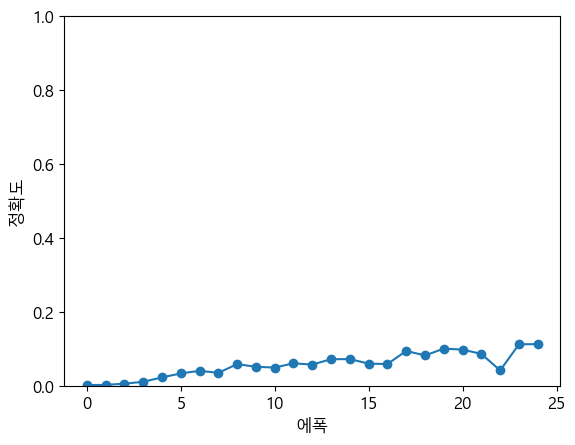

In [4]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
# from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = False  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

vanilla_acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad, eval_interval=150)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    vanilla_acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x = np.arange(len(vanilla_acc_list))
plt.plot(x, vanilla_acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

## seq2seq 개선

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 151 / 351 | 시간 2[s] | 손실 2.00
| 에폭 1 |  반복 301 / 351 | 시간 4[s] | 손실 1.76
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 666 
X 1001
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 1001
---
Q 600+257
T 857 
X 1000
---
Q 761+292
T 1053
X 1000
---
Q 830+597
T 1427
X 1000
---
Q 26+838 
T 864 
X 1001
---
Q 143+93 
T 236 
X 703 
---
검증 정확도 0.120%
| 에폭 2 |  반복 1 / 351 | 시간 0[s] | 손실 1.73
| 에폭 2 |  반복 151 / 351 | 시간 1[s] | 손실 1.70
| 에폭 2 |  반복 301 / 351 | 시간 3[s] | 손실 1.63
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 666 
X 690 
---
Q 8+155  
T 163 
X 1000
---
Q 367+55 
T 422 
X 470 
---
Q 600+257
T 857 
X 700 
---
Q 761+292
T 1053
X 1000
---
Q 830+597
T 1427
X 1444
---
Q 26+838 
T 864 
X 700 
---
Q 143+93 
T 236 
X 370 
---
검증 정확도 0.400%
| 에폭 3 |  반복 1 / 351 | 시간 0[s] | 손실 1.52
| 에폭 3 |  반복 151 / 351 | 시간 1[s] | 손실 1.47
| 에폭 3 |  반복 301 / 351 | 시간 3[s] | 손실 1.34
Q 77+85  
T 162 
X 158 
---
Q 9

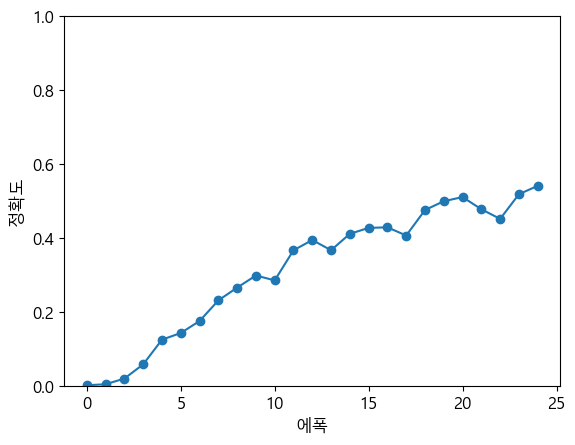

In [1]:
#<입력 데이터 반전>

# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
# from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

reverse_acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad, eval_interval=150)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    reverse_acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x_reverse = np.arange(len(reverse_acc_list))
plt.plot(x_reverse, reverse_acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

## 결과 해석
# 기존(데이터 반전하지 않음)보다 정확도가 개선되었음(11%->54% = 정확도 390% 향상)

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.57
| 에폭 1 |  반복 151 / 351 | 시간 1[s] | 손실 1.99
| 에폭 1 |  반복 301 / 351 | 시간 3[s] | 손실 1.76
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1013
---
Q 582+84 
T 666 
X 102 
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 1023
---
Q 600+257
T 857 
X 1023
---
Q 761+292
T 1053
X 1023
---
Q 830+597
T 1427
X 1111
---
Q 26+838 
T 864 
X 102 
---
Q 143+93 
T 236 
X 102 
---
검증 정확도 0.280%
| 에폭 2 |  반복 1 / 351 | 시간 0[s] | 손실 1.71
| 에폭 2 |  반복 151 / 351 | 시간 1[s] | 손실 1.70
| 에폭 2 |  반복 301 / 351 | 시간 3[s] | 손실 1.64
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1200
---
Q 582+84 
T 666 
X 690 
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 690 
---
Q 600+257
T 857 
X 999 
---
Q 761+292
T 1053
X 1029
---
Q 830+597
T 1427
X 1240
---
Q 26+838 
T 864 
X 792 
---
Q 143+93 
T 236 
X 290 
---
검증 정확도 0.400%
| 에폭 3 |  반복 1 / 351 | 시간 0[s] | 손실 1.58
| 에폭 3 |  반복 151 / 351 | 시간 1[s] | 손실 1.54
| 에폭 3 |  반복 301 / 351 | 시간 3[s] | 손실 1.43
Q 77+85  
T 162 
X 154 
---
Q 9

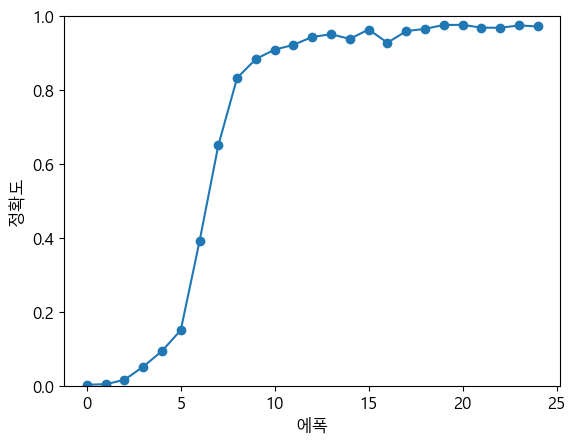

In [2]:
# 엿보기(Peeky) = 출력 h를 여러 층에서 공유하기(현재는 최초의 LSTM 계층만이 h를 사용하므로, decoder의 다른 계층ㅇ에도 )

# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
# model = Seq2seq(vocab_size, wordvec_size, hideen_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

peeky_acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad, eval_interval=150)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    peeky_acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x_peeky = np.arange(len(peeky_acc_list))
plt.plot(x_reverse, peeky_acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

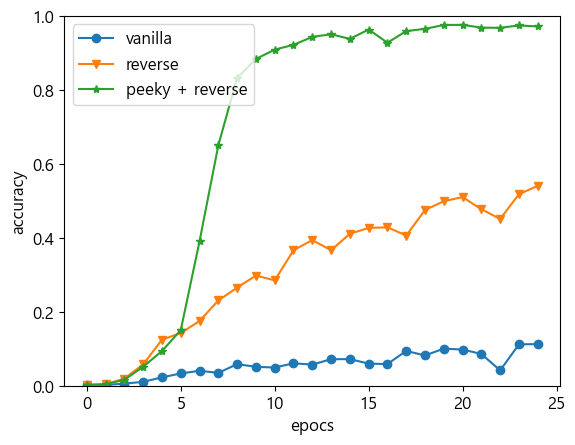

In [5]:
# 3가지 결과 비교

plt.plot(x, vanilla_acc_list, marker='o')
plt.plot(x_reverse, reverse_acc_list, marker='v')
plt.plot(x_peeky, peeky_acc_list, marker='*')
plt.legend(['vanilla', 'reverse', 'peeky + reverse'], loc='upper left')
plt.xlabel('epocs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()
